In [1]:
include("./SDF/SerialSDF.jl");
include("./SDF/SDFVis.jl");
using .SerialSDF
using .SDFVis

using Plots

In [2]:
# 2x2 in the center of a matrix
midpoint = zeros(Bool, 256,256)
midpoint[128:129, 128:129] .= true
# create just a couple of random
dots = rand(Float64,256,256) .< 0.001
# circle shapes
circle = zeros(Bool, 256,256)
filledCircle = zeros(Bool, 256,256)

for x in 1:256
    for y in 1:256
        dist = sqrt((x-128.5)^2 + (y-128.5)^2)
        circle[x,y] = dist ≥ 100 && dist ≤ 101
        filledCircle[x,y] = dist ≤ 50
    end
end

In [6]:
@time filledCircleSDF = dijkstraSDF2D(filledCircle)

  0.086888 seconds (235 allocations: 7.564 MiB)


256×256 Matrix{Float64}:
 130.11   129.401  128.695  127.986  …  127.986  128.695  129.401  130.11
 129.401  128.695  127.986  127.281     127.281  127.986  128.695  129.401
 128.695  127.986  127.281  126.572     126.572  127.281  127.986  128.695
 127.986  127.281  126.572  125.867     125.867  126.572  127.281  127.986
 127.281  126.572  125.867  125.158     125.158  125.867  126.572  127.281
 126.572  125.867  125.158  124.453  …  124.453  125.158  125.867  126.572
 125.867  125.158  124.453  123.744     123.744  124.453  125.158  125.867
 125.158  124.453  123.744  123.039     123.039  123.744  124.453  125.158
 124.453  123.744  123.039  122.329     122.329  123.039  123.744  124.453
 123.744  123.039  122.329  121.624     121.624  122.329  123.039  123.744
 123.039  122.329  121.624  120.915  …  120.915  121.624  122.329  123.039
 122.338  121.624  120.915  120.21      120.21   120.915  121.624  122.338
 121.641  120.924  120.21   119.501     119.501  120.21   120.924  121.641
 

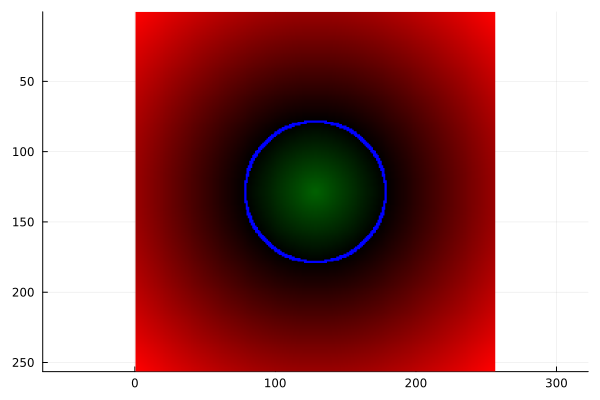

In [7]:
plot(toImageSDF(filledCircleSDF))

In [8]:
@time filledCircleBruteForceSDF = bruteSDF2D(filledCircle)

  3.928274 seconds (2 allocations: 512.047 KiB)


256×256 Matrix{Float64}:
 130.11   129.401  128.695  127.986  …  127.986  128.695  129.401  130.11
 129.401  128.695  127.986  127.281     127.281  127.986  128.695  129.401
 128.695  127.986  127.281  126.572     126.572  127.281  127.986  128.695
 127.986  127.281  126.572  125.867     125.867  126.572  127.281  127.986
 127.281  126.572  125.867  125.158     125.158  125.867  126.572  127.281
 126.572  125.867  125.158  124.453  …  124.453  125.158  125.867  126.572
 125.867  125.158  124.453  123.744     123.744  124.453  125.158  125.867
 125.158  124.453  123.744  123.039     123.039  123.744  124.453  125.158
 124.453  123.744  123.039  122.329     122.329  123.039  123.744  124.453
 123.744  123.039  122.329  121.624     121.624  122.329  123.039  123.744
 123.039  122.329  121.624  120.915  …  120.915  121.624  122.329  123.039
 122.338  121.624  120.915  120.21      120.21   120.915  121.624  122.338
 121.641  120.924  120.21   119.501     119.501  120.21   120.924  121.641
 